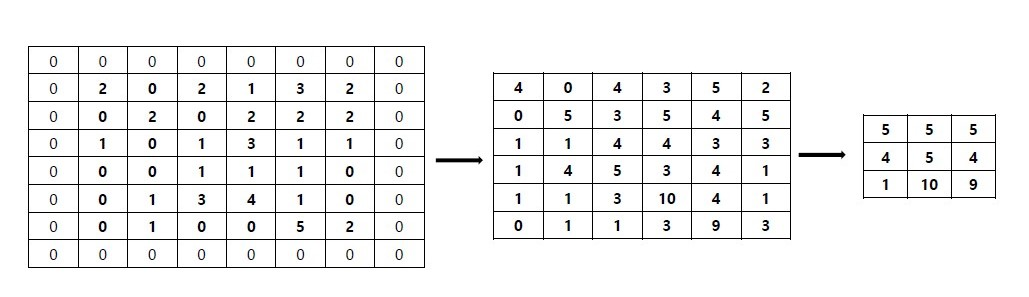

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [4]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [5]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [12]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=4, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))              

        self.fc1 = torch.nn.Linear(2 * 2 * 128, 625, bias=True) #layer3 output size = 2*2*128 
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p= 0.5))
            
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
            
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)    
        out = out.view(out.size(0), -1) 
        out = self.layer4(out)    
        out = self.fc2(out)
        return out

In [13]:
model = CNN().to(device)

In [14]:
criterion = torch.nn.CrossEntropyLoss().to(device)  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
total_batch = len(data_loader)
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
[Epoch:    1] cost = 0.263478845
[Epoch:    2] cost = 0.0633890107
[Epoch:    3] cost = 0.0450176299
[Epoch:    4] cost = 0.0361721627
[Epoch:    5] cost = 0.028899109
[Epoch:    6] cost = 0.024372926
[Epoch:    7] cost = 0.0195842478
[Epoch:    8] cost = 0.0180532783
[Epoch:    9] cost = 0.0151448399
[Epoch:   10] cost = 0.0140755307
[Epoch:   11] cost = 0.0145438146
[Epoch:   12] cost = 0.0112726679
[Epoch:   13] cost = 0.00931129511
[Epoch:   14] cost = 0.0114934267
[Epoch:   15] cost = 0.0105489781
Learning Finished!


In [16]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test),1,28,28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction,1)== Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy: ', accuracy.item())

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy:  0.9865000247955322
